# TER: Aide à l’orientation dans le supérieur : comparaison d’algorithmes

# Creation du jeu de données

On va travailler sur le fichier full_gea.csv
On va commencer par explorer nos données puis on va créer 15 jeu de données différents.

In [1]:
import numpy as np
import pandas as pd
import csv 

In [2]:
#importation du dataset 
df = pd.read_csv('full_gea.csv')

#taille du dataset: 135 lignes et 1909 colonnes
df.shape

(135, 1909)

In [3]:
df.describe()

,sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_1_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_5_delta_cla,sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla,sciences_economiques_et_sociales_3_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_2_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_5_delta_cla,sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla,...,scolarite_terminale_2018_2019_etablissement_0300950V,scolarite_terminale_2018_2019_etablissement_0782924E,scolarite_terminale_2018_2019_etablissement_0830015R,scolarite_terminale_2018_2019_etablissement_0830053G,scolarite_terminale_2018_2019_etablissement_0831646N,scolarite_terminale_2018_2019_etablissement_1380001B,scolarite_terminale_2018_2019_etablissement_3500045X,scolarite_terminale_2018_2019_etablissement_3500049B,scolarite_terminale_2018_2019_etablissement_3510001U,scolarite_terminale_2018_2019_etablissement_6200002H
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,6.162963,12.266667,8.918519,8.407407,5.851852,2.111111,18.822222,16.214815,16.177778,9.888889,...,0.014815,0.007407,0.014815,0.007407,0.007407,0.007407,0.007407,0.007407,0.014815,0.007407
std,35.711574,51.361057,46.570930,49.113377,46.276992,41.713605,71.534030,75.524374,75.502977,71.153992,...,0.121261,0.086066,0.121261,0.086066,0.086066,0.086066,0.086066,0.086066,0.121261,0.086066
min,-99.000000,-130.000000,-109.000000,-139.000000,-160.000000,-130.000000,-150.000000,-200.000000,-200.000000,-200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.500000,19.500000,9.500000,19.000000,9.500000,0.000000,24.500000,24.500000,24.500000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,139.000000,199.000000,229.000000,200.000000,149.000000,159.000000,399.000000,249.000000,249.000000,249.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


On affiche les informations relatives à la dataset en utilisant la fonction suivante :

In [4]:
#informations sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Columns: 1909 entries, sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla to scolarite_terminale_2018_2019_etablissement_6200002H
dtypes: float64(468), int64(1359), object(82)
memory usage: 2.0+ MB


### Supprimer les colonnes de texte

In [5]:
#on selectionne les données numériques
data = df._get_numeric_data()
#type des données
data.dtypes

sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla    int64
sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla                int64
sciences_economiques_et_sociales_1_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla                int64
sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_4_delta_cla_5_delta_cla                int64
sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_5_delta_cla                int64
                                                                                                ...  
scolarite_terminale_2018_2019_etablissement_1380001B                                            int64
scolarite_terminale_2018_2019_etablissement_3500045X                                            int64
scolarite_terminale_2018_2019_etablissement_3500049B                                            int64
scolarite_terminale_2018_2019_etablissement_3510001U                              

### Supprimer les Nan

In [6]:
#nombre de valeurs manquantes l’ensemble de données
nan = data.isna().sum().sum()
print(nan)

20224


In [7]:
data.mean()

sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla     6.162963
sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla                12.266667
sciences_economiques_et_sociales_1_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla                 8.918519
sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_4_delta_cla_5_delta_cla                 8.407407
sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_5_delta_cla                 5.851852
                                                                                                  ...    
scolarite_terminale_2018_2019_etablissement_1380001B                                             0.007407
scolarite_terminale_2018_2019_etablissement_3500045X                                             0.007407
scolarite_terminale_2018_2019_etablissement_3500049B                                             0.007407
scolarite_terminale_2018_2019_etablissement_35

In [8]:
#remplacer les Nan par la moyenne de chaque colonne
data = data.fillna(data.mean())
#on vérifie qu'il n'y a plus de Nan
print(data.isna().sum().sum())

0


In [9]:
data.head()

,sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_1_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_5_delta_cla,sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla,sciences_economiques_et_sociales_3_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_2_delta_cla_4_delta_cla_5_delta_cla,sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_5_delta_cla,sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla,...,scolarite_terminale_2018_2019_etablissement_0300950V,scolarite_terminale_2018_2019_etablissement_0782924E,scolarite_terminale_2018_2019_etablissement_0830015R,scolarite_terminale_2018_2019_etablissement_0830053G,scolarite_terminale_2018_2019_etablissement_0831646N,scolarite_terminale_2018_2019_etablissement_1380001B,scolarite_terminale_2018_2019_etablissement_3500045X,scolarite_terminale_2018_2019_etablissement_3500049B,scolarite_terminale_2018_2019_etablissement_3510001U,scolarite_terminale_2018_2019_etablissement_6200002H
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,50,-10,-10,-30,0,50,50,49,99,...,0,0,1,0,0,0,0,0,0,0
3,10,10,10,10,0,29,0,0,0,49,...,0,0,0,0,0,0,0,0,0,0
4,59,180,59,69,39,9,200,249,249,199,...,0,0,0,0,0,0,0,0,0,0


### Suppression des colonnes indésirables 


In [10]:
data["resultats_iut_rang"]

0       31
1      125
2       29
3       94
4       28
      ... 
130    116
131     67
132     59
133     51
134     68
Name: resultats_iut_rang, Length: 135, dtype: int64

In [11]:
print(data.columns.tolist()) 

['sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla', 'sciences_economiques_et_sociales_3_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_2_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_3_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_3_del

In [12]:
data.drop(['resultats_iut_rang', 'resultats_iut_tdam111', 'resultats_iut_tdam112', 'resultats_iut_tdam113', 
           'resultats_iut_tdam114', 'resultats_iut_tdam115', 'resultats_iut_tdam116', 'resultats_iut_tdam117',
           'resultats_iut_tdam118', 'resultats_iut_tdam119', 'resultats_iut_tdam121', 'resultats_iut_tdam122', 
           'resultats_iut_tdam123', 'resultats_iut_tdam124', 'resultats_iut_tdam125', 'resultats_iut_tdam126', 
           'resultats_iut_tdam127', 'resultats_iut_tdats1bs', 'resultats_iut_tdats1pa',
           'resultats_iut_tdatu11', 'resultats_iut_tdatu12'], axis=1, inplace=True)

print(data.columns.tolist()) 

['sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_3_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_2_delta_cla_3_delta_cla_4_delta_cla', 'sciences_economiques_et_sociales_3_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_2_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_2_delta_cla_3_delta_cla_4_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_4_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_3_delta_cla_5_delta_cla', 'sciences_economiques_et_sociales_1_delta_cla_3_del

### Visualisation des données 
#### 1- Visualiser l'ensemble des données d'une data.frame sous forme de heatmap


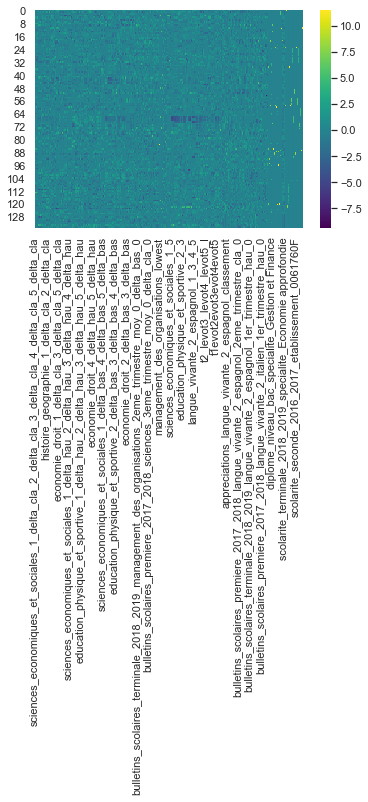

In [70]:
import matplotlib.pyplot as plt

# Etape 1 - Centrer les données contenues dans une dataframe mydata
temp = data.sub(data.mean()) # soustraire la moyenne

# Etape 2 - Réduire les données
temp = temp.div(temp.std()) # diviser par l'écart-type

# Etape 3 - Tracer la heatmap()
import seaborn as sns; sns.set()
sns.heatmap(temp,cmap="viridis") 
plt.show()

#### 2- Afficher une matrice de graphiques pour mettre en relation toutes les variables


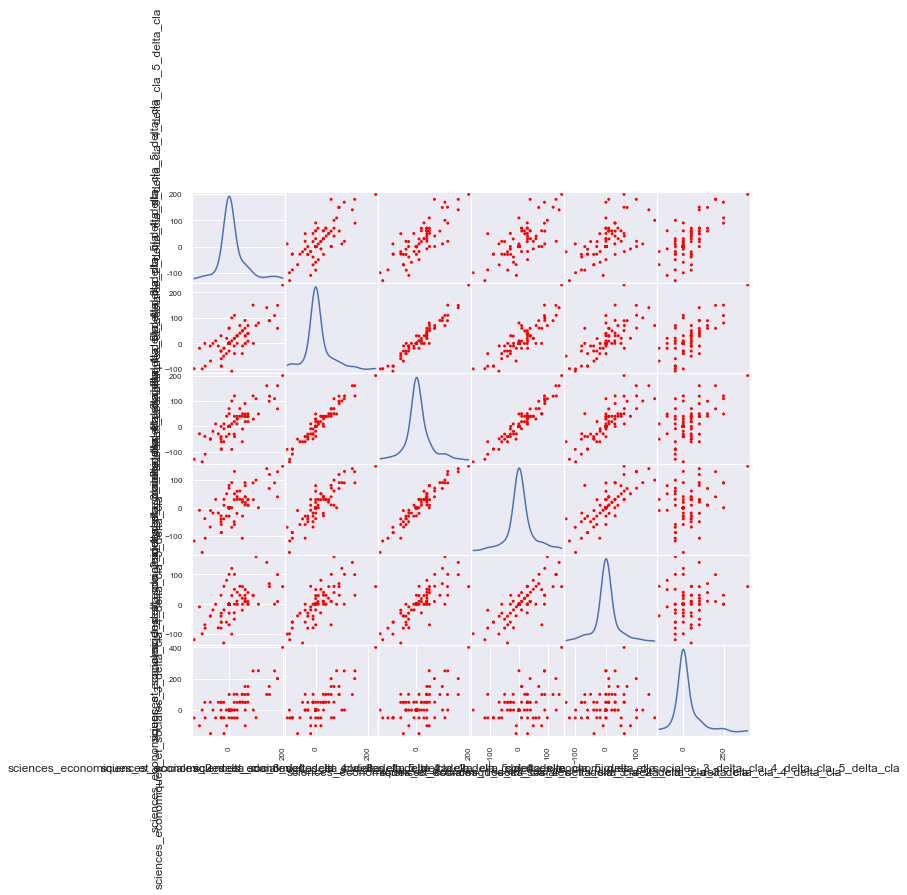

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(data.iloc[:,1:7], alpha = 1, figsize = (10, 10), diagonal = 'kde',color="red")
plt.show() # On voit que les variables discrètes sont éliminées

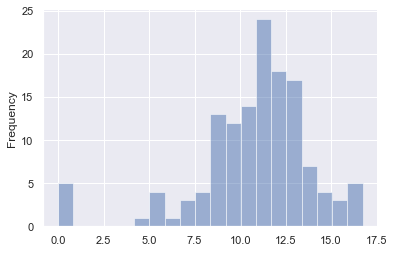

In [14]:
#afficher l'histograme des résultats finaux en IUT
data["resultats_iut_tdats1"].plot(kind='hist',alpha=0.5,bins=20)
plt.show()

# Creation des données de la classification binaire 0/1 (échec/réussite)

In [13]:
echec = data[ data['resultats_iut_tdats1'] < 10 ]
reussite = data[ data['resultats_iut_tdats1'] >= 10 ]

print('Nombre total élèves:', len(data['resultats_iut_tdats1']))
print('Echecs:', len(echec)) # 42/135 echec
print('Reussites:',len(reussite)) #93/135 reussite

Nombre total élèves: 135
Echecs: 42
Reussites: 93


In [14]:
data_class2 = data.copy() #dataframe pour la classification binaire

In [15]:
data_class2["resultats_iut_tdats1"] = data_class2["resultats_iut_tdats1"].where(data_class2["resultats_iut_tdats1"]>=10, 0)
data_class2["resultats_iut_tdats1"] = data_class2["resultats_iut_tdats1"].where(data_class2["resultats_iut_tdats1"]<10, 1)

print(data_class2["resultats_iut_tdats1"])

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
130    0.0
131    1.0
132    1.0
133    1.0
134    1.0
Name: resultats_iut_tdats1, Length: 135, dtype: float64


In [16]:
echec = data_class2[ data_class2['resultats_iut_tdats1'] == 0 ]
reussite = data_class2[ data_class2['resultats_iut_tdats1'] == 1 ]

print('Nombre total élèves:', len(data_class2['resultats_iut_tdats1']))
print('Echecs:', len(echec)) 
print('Reussites:',len(reussite)) 

Nombre total élèves: 135
Echecs: 42
Reussites: 93


### Fractionnement de l’ensemble de données

On utilise la fonction train_test_split pour fractionner l’ensemble des données en données de train 70% et de test 30%.

In [17]:
from sklearn.model_selection import train_test_split

# split the data into train and test set
train, test = train_test_split(data_class2, test_size=0.3, random_state=42, shuffle=True)

print(train.shape)
print(test.shape)

(94, 1806)
(41, 1806)


In [18]:
from pathlib import Path

#directories
# determine the path where to save the train and test file
data_dir = Path('', 'generated_data_class2')
for i in range(1,16):
    # split the data into train and test set
    train, test = train_test_split(data_class2, test_size=0.3, random_state=i, shuffle=True)
    #creation of the train and test files
    train_i = f'train{i}.csv'
    test_i = f'test{i}.csv'
    train_path = Path(data_dir, train_i)
    test_path = Path(data_dir, test_i)
    # save the train and test file
    # again using the '\t' separator to create tab-separated-values files
    train.to_csv(train_path, index=False)
    test.to_csv(test_path, index=False)

# Creation des données de la multi-classification 0/1/2 (échec/réussite/moyen)


In [29]:

echec = data[ data['resultats_iut_tdats1'] < 9 ]
reussite = data[ data['resultats_iut_tdats1'] >= 11 ]
moyens = data[ (data['resultats_iut_tdats1'] >= 9) & (data['resultats_iut_tdats1'] <11)]

print('Nombre total élèves:', len(data['resultats_iut_tdats1']))
print('Echecs:', len(echec))
print('Reussites:',len(reussite)) 
print('Moyens:',len(moyens))

Nombre total élèves: 135
Echecs: 27
Reussites: 76
Moyens: 32


In [30]:
data_class3 = data.copy() #dataframe pour la multi-classification

In [31]:
#echecs: classe 0
data_class3["resultats_iut_tdats1"] = data_class3["resultats_iut_tdats1"].where(data_class3["resultats_iut_tdats1"]>=9, 0)
#réussite: classe 1
data_class3["resultats_iut_tdats1"] = data_class3["resultats_iut_tdats1"].where(data_class3["resultats_iut_tdats1"]<11, 1)
#moyens: classe 2
data_class3["resultats_iut_tdats1"] = data_class3["resultats_iut_tdats1"].where(data_class3['resultats_iut_tdats1']<2, 2)



In [32]:
echec = data_class3[data_class3['resultats_iut_tdats1'] ==0]
reussite = data_class3[data_class3['resultats_iut_tdats1'] == 1]
moyens = data_class3[data_class3['resultats_iut_tdats1'] ==2]

print('Nombre total élèves:', len(data_class3['resultats_iut_tdats1']))
print('Echecs:', len(echec))
print('Reussites:',len(reussite))
print('Moyens:',len(moyens))

Nombre total élèves: 135
Echecs: 27
Reussites: 76
Moyens: 32


### Fractionnement de l’ensemble de données

On utilise la fonction train_test_split pour fractionner l’ensemble des données en données de train 70% et de test 30%.

In [33]:
from sklearn.model_selection import train_test_split

# split the data into train and test set
train, test = train_test_split(data_class3, test_size=0.3, random_state=42, shuffle=True)

print(train.shape)
print(test.shape)

(94, 1806)
(41, 1806)


In [34]:
#directories
# determine the path where to save the train and test file
data_dir = Path('', 'generated_data_class3')
for i in range(1,16):
    # split the data into train and test set
    train, test = train_test_split(data_class3, test_size=0.3, random_state=i, shuffle=True)
    #creation of the train and test files
    train_i = f'train{i}.csv'
    test_i = f'test{i}.csv'
    train_path = Path(data_dir, train_i)
    test_path = Path(data_dir, test_i)
    # save the train and test file
    # again using the '\t' separator to create tab-separated-values files
    train.to_csv(train_path, index=False)
    test.to_csv(test_path, index=False)